# Final Bootcamp Project | Predicting Coffee Prices

Process:

1. [Case Study](#intro)
2. [Import Libraries](#importlib)
3. [Get data](#getdata)
4. [Cleaning/Wrangling/EDA](#cleaning)
    1. [Cleaning Dataframe](#cleaningdf)
    2. [EDA (Exploratory Data Analysis)](#EDA)
    2. [dropping any rows and columns that need to be dropped](#pC)
5. [Processing Data](#processing)
    1. [X/y-Split](#pXy)
    2. [Train/Test split](#pTT)
    3. [split both Train and Test in numericals and categoricals](#pTTnumcat)
    4. [transformations on numericals](#pNum)
        1. [MIN-MAX-Scaling](#pNumfit)
        2. [Standardizing](#pNumTrans)
        3. [Log-transformation](#pNumTrans)
    5.  [encoding categoricals](#pCat)
        1. [Ordinal Encoding](#pCatfit)
        2. [Onehot Encoding](#pCatEncode)
    6. [combine train and test-data](#pCombineTrain)
6. [Modeling](#modeling)
    1. [define model](#pmodel)
    2. [fit model on train_processed](#pmodelFit)  
7. [Validation](#validation)
    1. [evaluate (score) model on test_processed](#pevaluation)
    2. [save model and transformers/encoders (2)](#pSaving)
8. [Predicting](#predicting)
    1. [drop columns and rows according to the criteria used in (3.1)](#ppredict1)
    2. [split in numericals and categoricals](#ppredict2)
    3. [transform numericals and encode categoricals using transformers/encoders saved in (4.3)](#ppredict3)
    4. [make predictions using model saved in (2)](#ppredict4)
9. [Reporting](#reporting)

<a id='intro'></a>
## 1. Case Study / Introduction

What Drives the Price of Coffee? 
1. Supply:  <font color='red'> Nice Picture of Supply Chain: https://www.visualcapitalist.com/from-bean-to-brew-the-coffee-supply-chain/ </font>
    1. Geopolitics
        1. https://freedomhouse.org/countries/nations-transit/scores --> democracy scores
        2. trade / BRICS- relationships?
    2. Climate
        1. <font color='yellow'>Weather Data in the Coffee Belt --> focus only on 10 biggest producer countries:
            1. Brazil
            2. Vietnam
            3. Colombia
            4. Indonesia
            5. Ethiopia
            -----
            6. Honduras
            7. India
            8. Uganda
            9. Mexico
            10. Guatemala

            The top five coffee-producing countries account for about two-thirds of global production, and the two largest producers – Brazil and Vietnam – often account for about half of annual production.</font>

        2. How to account for Arabica and Robusta ?  
        Lower altitude crops require well-defined rainy and dry seasons and altitudes of between 1,800 and 3,600 feet. Such conditions produce distinct growing and maturation seasons. Mexico, Jamaica, some areas of Brazil, and Zimbabwe are countries with these types of conditions. Higher altitude crops grow near the equator at altitudes of 3,600 to 6,300 feet. Coffee plants here require frequent rainfall and produce two harvesting seasons. Kenya, Colombia, and Ethiopia are countries with these climate and geographical conditions. Robusta plants generally grow at much lower altitudes than Arabica crops. Coffee producers plant Robusta in regions 10 degrees north or south of the equator at altitudes ranging from sea level to 3,000 feet. Robusta plants can tolerate warmer weather than Arabica plants.
    3. Volumne:
        1. <font color='green'> Production volume (related to climate) --> ok Data!</font>
        2. Inventory volumne?

    4. Transportation and Oil 
        1. <font color='green'> Oil Prices</font>
        2. Check for Transportation with LNG ?

2. Demand:
    1. Discretionary Income 
        1. Influence on Demand: <font color='green'>In developed regions such as the EU and the United States, trends in unemployment and average hourly earnings could serve as important barometers for changes in coffee consumption --> data: inflation OECD </font>
        2. Demand: In emerging markets, overall economic growth could impact coffee consumption. China, for example, has shown a pattern of shifting toward Western dietary norms as its economy has matured.
    2. Prices Health Issues

Sources:

1. Website article: "Coffee: Guide To Production & Pricing", Accessed on 27.01.2023
https://commodity.com/soft-agricultural/coffee/#What_Drives_the_Price_of_Coffee

<a id='importlib'></a>
## 2. Import Libraries

In [755]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# for target
#pip install yfinance
#pip install yfinance --upgrade --no-cache-dir 
import yfinance as yf

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# #train-test-split
# from sklearn.model_selection import train_test_split

# #scaling numerical variables
# from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
# from sklearn.preprocessing import StandardScaler

# #categorical variables
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OrdinalEncoder

# #for regression
# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import 12isionTreeRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_score

#for stats
import scipy.stats as stats

#for time/dates
import time
from datetime import date
from datetime import datetime

# #for clustering
# from sklearn import cluster, datasets
# from sklearn.cluster import KMeans
# import pickle
# from sklearn.metrics import silhouette_score

# for API
import json
import requests

# respectful nap
from random import randint
from time import sleep

## Get Data

### Get Data - Target Value: Daily Coffee Price

Data from 03.01.2000 - present (26.01.2023) https://finance.yahoo.com/quote/KC%3DF?p=KC%3DF  

Prices are in [US cents/lb] and the volume in [lb]

Data prior on a daily basis is not available for free neither on finance yahoo nor on the ico website (https://www.ico.org/new_historical.asp). Only Monthly Averages are available 1990 - Present.

In [68]:
yahoo_import_coffee = yf.download('KC=F', start="2000-01-04", end="2023-01-26")

[*********************100%***********************]  1 of 1 completed


In [93]:
data_coffee_price = yahoo_import_coffee
display(data_coffee_price.shape)
data_coffee_price.head(5)

(5780, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04 00:00:00-05:00,116.50,120.500000,115.750000,116.250000,116.250000,5492
2000-01-05 00:00:00-05:00,115.00,121.000000,115.000000,118.599998,118.599998,6165
2000-01-06 00:00:00-05:00,119.00,121.400002,116.500000,116.849998,116.849998,5094
2000-01-07 00:00:00-05:00,117.75,117.750000,113.800003,114.150002,114.150002,6855
2000-01-10 00:00:00-05:00,126.00,126.000000,116.699997,117.550003,117.550003,7499


In [94]:
# Function to clean yahoo-datasets:

def clean_yahoo(df):
    df = df.pivot_table(index= ['Date']).reset_index()
    # daily average
    df['daily_average'] = (df['Open'] +  df['Close'])*0.5
    # dropping useless columns:
    df = df.drop(columns= ['Adj Close', 'Close', 'High', 'Low', 'Open'], axis=1)
    # standardize header names
    df.columns = [e.lower().replace(' ', '_') for e in df.columns]
    # clean date
    df.date = df.date.astype(str).str.split(" ").str[0].astype('datetime64')
    return df


In [95]:
data_coffee_price = clean_yahoo(data_coffee_price)
data_coffee_price.head()

,date,volume,daily_average
0,2000-01-04,5492,116.375000
1,2000-01-05,6165,116.799999
2,2000-01-06,5094,117.924999
3,2000-01-07,6855,115.950001
4,2000-01-10,7499,121.775002


In [96]:
#save intermediate results:
data_coffee_price.to_csv('data_coffee_price.csv', index=False)

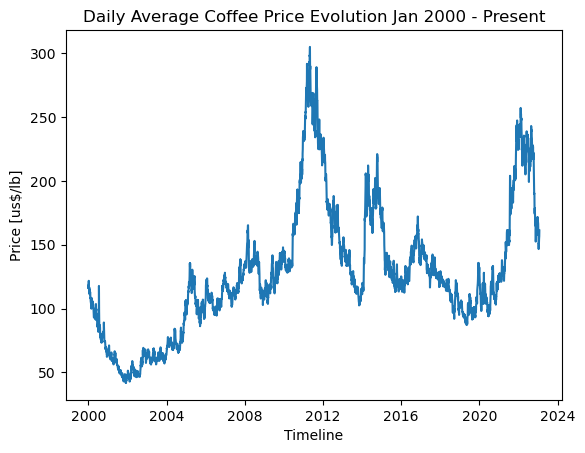

In [98]:
plt.plot(data_coffee_price.date,data_coffee_price.daily_average)
plt.xlabel('Timeline')
plt.ylabel('Price [us$/lb]')
plt.title('Daily Average Coffee Price Evolution 1 2000 - Present')
plt.show()

### Get Data - Supply - Transportation: Crude Oil

Data from 03.01.2000 - present (26.01.2023) https://finance.yahoo.com/quote/KC%3DF?p=KC%3DF  

Prices are in [US cents/barrel] and the volume in [lb]

In [99]:
yahoo_import_oil = yf.download('CL=F', start="2000-01-04", end="2023-01-26") #date.today()

[*********************100%***********************]  1 of 1 completed


In [100]:
data_oil_price = yahoo_import_oil
display(data_oil_price.shape)
data_oil_price.head(5)

(5632, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23 00:00:00-04:00,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24 00:00:00-04:00,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25 00:00:00-04:00,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28 00:00:00-04:00,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29 00:00:00-04:00,32.820000,33.029999,32.560001,32.720001,32.720001,49131


In [101]:
data_oil_price = clean_yahoo(data_oil_price)
data_oil_price.head()

,date,volume,daily_average
0,2000-08-23,79385,32.000000
1,2000-08-24,72978,31.764999
2,2000-08-25,44601,31.875000
3,2000-08-28,46770,32.455000
4,2000-08-29,49131,32.770000


In [102]:
#save intermediate results:
data_oil_price.to_csv('data_oil_price.csv', index=False)

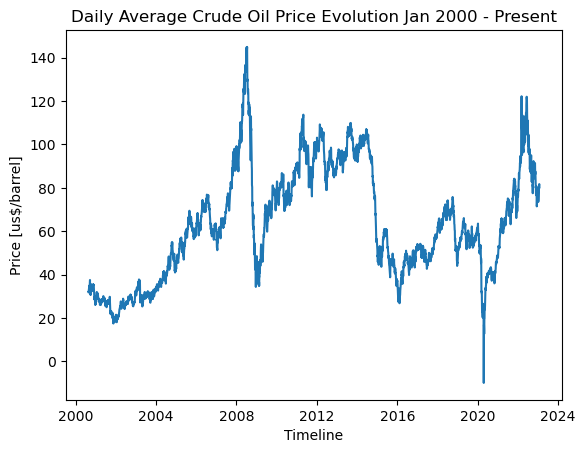

In [103]:
plt.plot(data_oil_price.date,data_oil_price.daily_average)
plt.xlabel('Timeline')
plt.ylabel('Price [us$/barrel]')
plt.title('Daily Average Crude Oil Price Evolution 1 2000 - Present')
plt.show()

### Get Data - Supply - Influence on production: Weather (especially frost days)

- Data from: https://power.larc.nasa.gov/data-access-viewer/

- Brazil: Coffee plantations, covering some 27,000 km2 (10,000 sq mi), are mainly located in the southeastern states of Minas Gerais, São Paulo and Paraná where the environment and climate provide ideal growing conditions. https://en.wikipedia.org/wiki/Coffee_production_in_Brazil#/media/File:Brazilian_coffee_growing_regions_(arabica_and_robusta).png

- 

In [745]:
locations = [
    ['brazil_minas_gerais', '-20.99381692482433','-45.58331824167786'],
    ['brazil_alta_mogiana', '-20.25146199857644', '-47.60632683831677'],
    ['brazil_rondonia', '-9.340339865405975', '-63.8862970848236'],
    ['colombia_bella_vista', '4.439678121124939', '-75.81569291434761'],
    ['colombia_highlands', '5.674896883020882', '-73.4710397381943'],
    ['ethiopia_kuri_mountain', '8.993191517998033', '34.601556339696764'],
    ['ethiopia_shilcho_coop', '6.489290766609294', '38.38969597625702'],
    ['vietnam', '12.766856113119104', '108.00508881051391'],
]

In [752]:
locations[0][0]

'brazil_minas_gerais'

In [747]:
# we can only access the API for a period of max. 366 days.
start = (np.arange(20000101, 20230101,10000)).tolist()
start = [str(x) for x in start]
start

['20000101',
 '20010101',
 '20020101',
 '20030101',
 '20040101',
 '20050101',
 '20060101',
 '20070101',
 '20080101',
 '20090101',
 '20100101',
 '20110101',
 '20120101',
 '20130101',
 '20140101',
 '20150101',
 '20160101',
 '20170101',
 '20180101',
 '20190101',
 '20200101',
 '20210101',
 '20220101']

In [748]:
end = (np.arange(20001231, 20221231,10000)).tolist()
end = [str(x) for x in end]
end.append('20230126')
end

['20001231',
 '20011231',
 '20021231',
 '20031231',
 '20041231',
 '20051231',
 '20061231',
 '20071231',
 '20081231',
 '20091231',
 '20101231',
 '20111231',
 '20121231',
 '20131231',
 '20141231',
 '20151231',
 '20161231',
 '20171231',
 '20181231',
 '20191231',
 '20201231',
 '20211231',
 '20230126']

In [756]:
# maybe add additional parameter: PRECTOTCORR ??

# get for every location, for every year the frost_days
# this will be stored in dictionary: location with 1st key being the location and 2nd key being the year, the value being the JSON-Result from the API.
results = []
location = {}
for l in range(len(locations)):
    for st, e in zip(start, end):
        # print(st,e)
        URL = "https://power.larc.nasa.gov/api/temporal/daily/point?start="+st+"&end="+e+"&latitude="+locations[l][1]+"&longitude="+locations[l][2]+"&community=ag&parameters=FROST_DAYS&format=json&header=true&time-standard=lst"
        
        PowerNASA = requests.get(URL)
        results.append(PowerNASA.json())
    location[locations[l][0]] = results
    results = []
    sleep((randint(1,3000)/1000))# a respectful nap


In [777]:
nested_locations = []
for loc in range(len(locations)):
    nested_locations.append(locations[loc][0])
nested_locations

['brazil_minas_gerais',
 'brazil_alta_mogiana',
 'brazil_rondonia',
 'colombia_bella_vista',
 'colombia_highlands',
 'ethiopia_kuri_mountain',
 'ethiopia_shilcho_coop',
 'vietnam']

In [804]:
# get the actual information about the frost_days:
# this will be stored in dictionary: location_frost_days with 1st key being the location, 2nd key being the year, 3rd key being the day and the value being the frost_days.

results = []
location_frost_days = {}
location_precipitation = {}

for loc in nested_locations:
    for r in range(len(location[loc])):
        results.append(location[loc][r]['properties']['parameter']['FROST_DAYS'])

    location_frost_days[loc] = results
    results = []


In [805]:
location_frost_days['brazil_minas_gerais']

[{'20000101': 0.0,
  '20000102': 0.0,
  '20000103': 0.0,
  '20000104': 0.0,
  '20000105': 0.0,
  '20000106': 0.0,
  '20000107': 0.0,
  '20000108': 0.0,
  '20000109': 0.0,
  '20000110': 0.0,
  '20000111': 0.0,
  '20000112': 0.0,
  '20000113': 0.0,
  '20000114': 0.0,
  '20000115': 0.0,
  '20000116': 0.0,
  '20000117': 0.0,
  '20000118': 0.0,
  '20000119': 0.0,
  '20000120': 0.0,
  '20000121': 0.0,
  '20000122': 0.0,
  '20000123': 0.0,
  '20000124': 0.0,
  '20000125': 0.0,
  '20000126': 0.0,
  '20000127': 0.0,
  '20000128': 0.0,
  '20000129': 0.0,
  '20000130': 0.0,
  '20000131': 0.0,
  '20000201': 0.0,
  '20000202': 0.0,
  '20000203': 0.0,
  '20000204': 0.0,
  '20000205': 0.0,
  '20000206': 0.0,
  '20000207': 0.0,
  '20000208': 0.0,
  '20000209': 0.0,
  '20000210': 0.0,
  '20000211': 0.0,
  '20000212': 0.0,
  '20000213': 0.0,
  '20000214': 0.0,
  '20000215': 0.0,
  '20000216': 0.0,
  '20000217': 0.0,
  '20000218': 0.0,
  '20000219': 0.0,
  '20000220': 0.0,
  '20000221': 0.0,
  '20000222'

In [806]:
# flatten the dictionary: location_frost_days with 1st key being the location, 2nd key being the day and the value being the frost_days.
for loc in nested_locations:
    location_frost_days[loc] = dict((key,d[key]) for d in location_frost_days[loc] for key in d)


In [807]:
len(location_frost_days['brazil_minas_gerais'])

8427

In [825]:
frost_days_df = pd.DataFrame.from_dict(location_frost_days, orient='columns').reset_index()
frost_days_df.rename(columns = { 'index': 'date'}, inplace=True)
frost_days_df.date = pd.to_datetime(frost_days_df.date, format='%Y%m%d')
frost_days_df

,date,brazil_minas_gerais,brazil_alta_mogiana,brazil_rondonia,colombia_bella_vista,colombia_highlands,ethiopia_kuri_mountain,ethiopia_shilcho_coop,vietnam
0,2000-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8422,2023-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8423,2023-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8424,2023-01-24,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8425,2023-01-25,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [826]:
frost_days_df.dtypes

date                      datetime64[ns]
brazil_minas_gerais              float64
brazil_alta_mogiana              float64
brazil_rondonia                  float64
colombia_bella_vista             float64
colombia_highlands               float64
ethiopia_kuri_mountain           float64
ethiopia_shilcho_coop            float64
vietnam                          float64
dtype: object

In [111]:
# https://power.larc.nasa.gov/data-access-viewer/

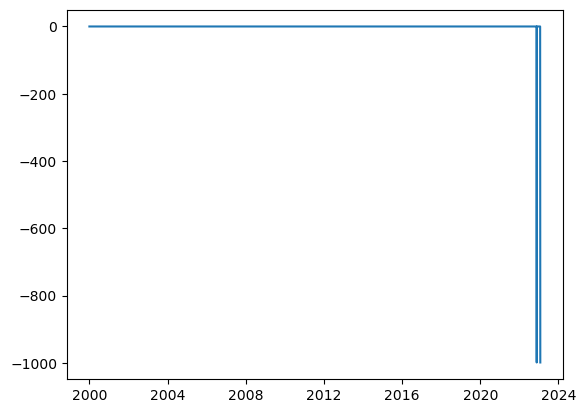

In [828]:
plt.plot(frost_days_df['date'],frost_days_df['brazil_minas_gerais'])
# plt.xlabel('Timeline')
# plt.ylabel('Price [us$/barrel]')
# plt.title('Daily Average Crude Oil Price Evolution Jan 2000 - Present')
plt.show()

### Get Data - Supply - Country Production (ICO)

<font color='green'>
Information is available yearly --> distribute yearly country production on the harvest period months/days. </font>

In [476]:
total_production = pd.read_excel('1a - Total production.xlsx', header=3)

In [477]:
display(total_production.shape)
total_production

(64, 32)

,Crop year,Unnamed: 1,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April group,NaN,40795.2926,42529.5454,46868.2042,40166.7591,39990.3663,29395.9601,44297.8201,39475.8391,...,71811.3709,64395.2131,75895.8810,74494.0133,69873.1443,71331.7881,75507.8515,70324.4647,81707.9885,76075.7437
2,Angola,(R/A),50.3450,79.3310,77.5200,32.6080,76.8020,62.1090,70.9250,64.3300,...,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,41.9027,51.8419
3,Bolivia (Plurinational State of),(A),122.7770,103.5360,120.2350,50.8230,116.9440,142.4850,124.5790,140.7190,...,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687,81.2654
4,Brazil,(A/R),27285.6286,27293.4934,34603.3542,28166.9786,28192.0470,18060.2022,29196.7430,26148.0040,...,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8179,65130.7997,58210.7127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Viet Nam,(R/A),1310.2880,1437.8480,2340.4470,3020.2160,3631.6090,3970.0860,5752.4810,6978.9420,...,19999.9999,26499.6111,23402.1057,27609.7814,27240.5219,31090.0419,27819.1762,33432.4990,30283.0748,30487.1644
60,Yemen,(A),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,161.1675,185.0677,187.5251,187.2981,178.3814,156.2460,143.4533,132.1281,85.5762,91.4278
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Total,NaN,93230.0596,101266.6844,98524.0942,91761.0531,93313.7693,87320.8691,103307.8761,99887.1611,...,140077.5378,141327.3877,151183.5121,153910.3398,150301.6726,156126.4745,162319.9801,163693.1027,172460.8203,165053.0157


In [478]:
# Function to clean excel-data:

def clean_excel(df):
    #drop rows with too many NaN-Values and last one (ICO - copyright)
    df = df.dropna(axis=0, how='all').drop(total_production.tail(1).index)
    # dropping useless columns:
    df = df.drop(columns= ['Unnamed: 1'], axis=1)
    # set_index, transpose the dataset, reset_index, 
    df = df.set_index('Crop year').T.reset_index()
    # standardize header names
    df.columns = [e.lower().replace(' ', '_') for e in df.columns]
    df = df.rename(columns = {'index': 'crop_year'})
    #convert crop_year into datetime, year information
    df['crop_year'] = df['crop_year'].str.split("/").str[0]
    df['crop_year'] = pd.to_datetime(df['crop_year'], format='%Y').dt.year
    return df


In [479]:
total_production = clean_excel(total_production)

In [480]:
total_production.head()

,crop_year,april_group,angola,bolivia_(plurinational_state_of),brazil,burundi,ecuador,indonesia,madagascar,malawi,...,sierra_leone,sri_lanka,thailand,togo,trinidad_&_tobago,uganda,venezuela,viet_nam,yemen,total
0,1990,40795.2926,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,...,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0,93230.0596
1,1991,42529.5454,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,...,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0,101266.6844
2,1992,46868.2042,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,...,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0,98524.0942
3,1993,40166.7591,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,...,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0,91761.0531
4,1994,39990.3663,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,...,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0,93313.7693


In [481]:
countries_top_ten_list = ['brazil', 'viet_nam', 'colombia', 'indonesia', 'ethiopia', 'honduras', 'india', 'uganda', 'mexico', 'guatemala']

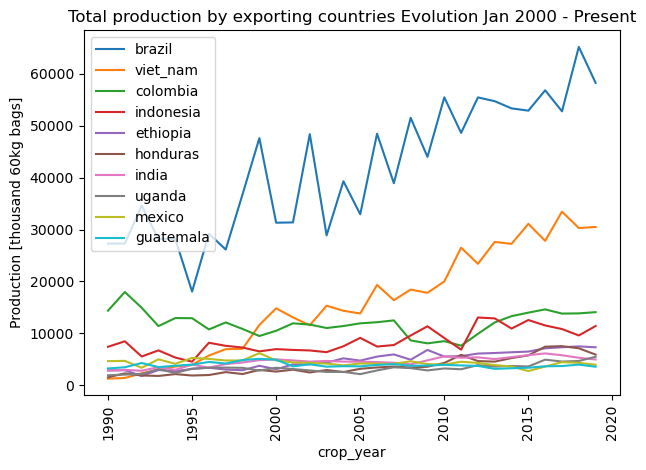

In [482]:
for country in countries_top_ten_list:
    plt.plot(total_production['crop_year'],total_production[country],label=country)

plt.xlabel('crop_year')
plt.ylabel('Production [thousand 60kg bags]')
plt.title('Total production by exporting countries Evolution Jan 2000 - Present')
plt.legend()
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [483]:
## Harvest periods for top 10 countries:

# https://nordicapproach.no/wp-content/uploads/2022/08/coffee-calendar-web-withKE-1.png
# https://thecaptainscoffee.com/pages/coffee-harvest-seasons-and-availability

#months: 1 = jan, 2 = feb, 3= mar, etc.

harvest_period = {'brazil': [5, 6, 7, 8],
                'viet_nam': [9,10,11,12,1],
                'colombia': [3,4,5,6,9,10,11,12],
                'indonesia': [5,6,7,8],
                'ethiopia': [10,11,12,1],
                'honduras': [1,2,3,4],
                'india': [1,2,3],
                'uganda': [5,6,7,8,9,10,11,12,1,2],
                'mexico': [11,12,1,2,3],
                'guatemala': [11,12,1,2,3]}


Crop year:
For example, the 2014/15 coffee year began on 1 October 2014 and ended 30 September
2015. However, for producers with crop years commencing on 1 April, the crop year
production occurs across two coffee years. Brazil’s 2014/15 crop year began on 1 April
2014 and finished 31 March 2015, covering the first half of coffee year 2014/15.
However, Brazil’s 2015/16 crop year commenced 1 April 2015 and ended 31 March 2016,
covering the latter half of coffee year 2014/15. In order to bring the crop year production
into a single coffee year, the Secretariat would allocate a portion of the April-March
2014/15 crop year production and a portion of the April-March 2015/16 production into
2014/15 coffee year production.  

It should be noted that while estimates for coffee year production are created for each
individual country, these are made for the purpose of creating a consistent aggregated
supply-demand balance for analytical purposes, and does not represent the production
occurring on the ground within the individual countries.

In [484]:
#following the april / july / october-group philosophy from excel.

# strategy for the production per day:
# crop_year 1990/91 began on 1 October 90 and ended 30 september 91

# aprilgroup - e.g. brazil: 
# crop_year 1990/91: 27285.6286 --> divided by two --> 1 half for oct 90 - mar 91, 1 half for mar 91 - sep 91.
# crop_year 1991/92: 27293.4934 --> divided by two --> 1 half for oct 91 - mar 92, 1 half for mar 92 - sep 91.

# oct 90: 27285.6286/2/6

start_crop_year = {'brazil': 'april',
                'viet_nam': 'october',
                'colombia': 'october',
                'indonesia': 'april',
                'ethiopia': 'october',
                'honduras': 'october',
                'india': 'october',
                'uganda': 'october',
                'mexico': 'october',
                'guatemala': 'october'}

In [504]:
daily_production_top_ten_countries = pd.DataFrame()
daily_production_top_ten_countries['date'] = frost_days_df.date
daily_production_top_ten_countries['year'] = daily_production_top_ten_countries['date'].dt.year
daily_production_top_ten_countries['month'] = daily_production_top_ten_countries['date'].dt.month
daily_production_top_ten_countries['day'] = daily_production_top_ten_countries['date'].dt.day
daily_production_top_ten_countries.head()

,date,year,month,day
0,2000-01-04,2000,1,4
1,2000-01-05,2000,1,5
2,2000-01-06,2000,1,6
3,2000-01-07,2000,1,7
4,2000-01-08,2000,1,8


- Assumption 1: every year has 360 days and every month has 30 days.
- Assumption 2: crop_year = calendar_year.
- "daily production" = "production per year" divided by amount of "harvest_months" and then by 30 days.
- "daily production" is distributed only on the days of the harvest_months. The other months have a "daily production" of 0.

In [505]:
for country in countries_top_ten_list:
    for year in daily_production_top_ten_countries.year.unique().tolist():
        daily_production_top_ten_countries[country] = np.where((np.where(daily_production_top_ten_countries['month'].isin(harvest_period[country]), 'harvest', 'no harvest') == 'harvest'), (total_production[(total_production['crop_year']==year)][country].values[0])/len(harvest_period[country])/30,0)

In [506]:
daily_production_top_ten_countries.head()

,date,year,month,day,brazil,viet_nam,colombia,indonesia,ethiopia,honduras,india,uganda,mexico,guatemala
0,2000-01-04,2000,1,4,0.0,98.94206,0.0,0.0,25.959575,22.22215,55.775184,11.33561,32.099859,32.931687
1,2000-01-05,2000,1,5,0.0,98.94206,0.0,0.0,25.959575,22.22215,55.775184,11.33561,32.099859,32.931687
2,2000-01-06,2000,1,6,0.0,98.94206,0.0,0.0,25.959575,22.22215,55.775184,11.33561,32.099859,32.931687
3,2000-01-07,2000,1,7,0.0,98.94206,0.0,0.0,25.959575,22.22215,55.775184,11.33561,32.099859,32.931687
4,2000-01-08,2000,1,8,0.0,98.94206,0.0,0.0,25.959575,22.22215,55.775184,11.33561,32.099859,32.931687


### Get Data - Supply

### Get Data - Demand - Imports (ICO)

In [539]:
imports = pd.read_excel('2b - Imports.xlsx', header=3)

In [540]:
display(imports.shape)
imports

(41, 31)

,Calendar years,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union,42882.776087,41143.872116,44529.994175,45254.467632,45402.131489,43424.386494,46408.406787,47865.245888,48868.782483,...,65522.106177,66052.716803,68136.852018,68030.663301,71893.205688,71995.027768,76402.459294,74221.374859,78151.221303,80057.043941
2,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
3,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5923.729993,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527
4,Belgium/Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
6,Croatia,NaN,NaN,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,393.825469,390.873959,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527
7,Cyprus,49.853999,53.926000,40.875999,77.412000,51.836001,43.769000,51.501999,41.340999,49.778999,...,76.728448,82.078754,83.877469,93.766183,94.388100,89.304875,93.153307,99.933874,133.179542,133.224874
8,Czechia,659.433000,525.274000,474.731003,514.277005,553.797003,553.196999,525.298002,560.225003,764.839002,...,950.721928,952.366595,1126.622901,1183.882242,1822.690779,2067.838569,1779.351245,1506.967219,1903.158902,1608.921470
9,Denmark,959.105004,982.757004,1061.623004,993.947000,1033.184003,877.159002,1005.999200,949.070500,1013.723201,...,1014.640895,908.869741,913.098994,921.178915,853.423879,840.777636,905.789619,852.193333,867.950523,907.935154


In [541]:
#drop all the rows, where there are NaN-values
imports = imports.dropna(axis=0)
imports

,Calendar years,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,European Union,42882.776087,41143.872116,44529.994175,45254.467632,45402.131489,43424.386494,46408.406787,47865.245888,48868.782483,...,65522.106177,66052.716803,68136.852018,68030.663301,71893.205688,71995.027768,76402.459294,74221.374859,78151.221303,80057.043941
2,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
5,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
7,Cyprus,49.853999,53.926000,40.875999,77.412000,51.836001,43.769000,51.501999,41.340999,49.778999,...,76.728448,82.078754,83.877469,93.766183,94.388100,89.304875,93.153307,99.933874,133.179542,133.224874
8,Czechia,659.433000,525.274000,474.731003,514.277005,553.797003,553.196999,525.298002,560.225003,764.839002,...,950.721928,952.366595,1126.622901,1183.882242,1822.690779,2067.838569,1779.351245,1506.967219,1903.158902,1608.921470
9,Denmark,959.105004,982.757004,1061.623004,993.947000,1033.184003,877.159002,1005.999200,949.070500,1013.723201,...,1014.640895,908.869741,913.098994,921.178915,853.423879,840.777636,905.789619,852.193333,867.950523,907.935154
11,Finland,1095.140998,1033.066999,1055.361000,1301.455999,1361.003002,769.499000,992.273602,1185.521302,1167.935302,...,1273.743443,1286.515065,1237.833040,1275.467965,1213.055380,1320.802279,1388.966280,1360.023736,1284.822821,1515.473931
12,France,6301.221035,6552.709041,6612.056041,6334.468044,6368.662042,6213.680045,6659.513448,6703.985251,6576.022652,...,6717.241889,6991.820108,6841.135557,6713.104855,7112.306134,6808.566640,6737.782710,6966.514663,7624.019021,7992.905036
13,Germany,13670.946005,13228.851004,13788.554006,14107.003006,13583.215008,12851.835005,13507.128909,13905.184716,13739.568415,...,20602.955791,20926.404580,21816.212008,21174.306912,22077.693664,21316.211718,22368.390781,21764.783862,22147.181429,22431.905432
14,Greece,641.963000,407.027001,348.923002,374.593002,502.128002,522.595004,765.506505,788.621003,704.455603,...,1061.327542,1154.525823,1243.663331,1269.093956,1233.605406,1209.964524,1583.737836,867.119379,1160.023658,1246.274130


In [542]:
# set_index, transpose the dataset, reset_index, 
imports = imports.set_index('Calendar years').T.reset_index()
imports.head()

Calendar years,index,European Union,Austria,Bulgaria,Cyprus,Czechia,Denmark,Finland,France,Germany,...,Spain,Sweden,Japan,Norway,Russian Federation,Switzerland,Tunisia,United Kingdom,United States of America,Total
0,1990,42882.776087,1879.717004,268.182998,49.853999,659.433000,959.105004,1095.140998,6301.221035,13670.946005,...,3053.251000,1766.674003,5329.750004,742.040002,0.000000,1170.508002,100.999998,2898.298008,21006.786010,74131.158111
1,1991,41143.872116,2058.271005,200.220001,53.926000,525.274000,982.757004,1033.066999,6552.709041,13228.851004,...,2969.543000,1717.087000,5510.469001,761.214999,0.000000,1130.292002,90.201001,2805.914005,19839.630013,71281.593136
2,1992,44529.994175,2206.416005,182.231012,40.875999,474.731003,1061.623004,1055.361000,6612.056041,13788.554006,...,3414.290003,1771.725002,5325.615998,739.145001,1381.858008,1101.251002,110.583001,3088.172009,22939.033012,79215.652205
3,1993,45254.467632,1836.489002,397.443006,77.412000,514.277005,993.947000,1301.455999,6334.468044,14107.003006,...,2813.088000,1756.601007,5691.120004,692.829002,1794.946013,1059.878001,100.624001,3196.981011,19328.721012,77119.566676
4,1994,45402.131489,1417.214004,462.668007,51.836001,553.797003,1033.184003,1361.003002,6368.662042,13583.215008,...,3028.425000,1893.292008,6217.151005,805.628000,1725.730019,1099.406002,137.267000,3465.860012,16171.245016,75024.418544


In [543]:
# standardize header names
imports.columns = [e.lower().replace(' ', '') for e in imports.columns]
imports = imports.rename(columns = {'index': 'calendar_year'})
imports.head()

,calendar_year,europeanunion,austria,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,spain,sweden,japan,norway,russianfederation,switzerland,tunisia,unitedkingdom,unitedstatesofamerica,total
0,1990,42882.776087,1879.717004,268.182998,49.853999,659.433000,959.105004,1095.140998,6301.221035,13670.946005,...,3053.251000,1766.674003,5329.750004,742.040002,0.000000,1170.508002,100.999998,2898.298008,21006.786010,74131.158111
1,1991,41143.872116,2058.271005,200.220001,53.926000,525.274000,982.757004,1033.066999,6552.709041,13228.851004,...,2969.543000,1717.087000,5510.469001,761.214999,0.000000,1130.292002,90.201001,2805.914005,19839.630013,71281.593136
2,1992,44529.994175,2206.416005,182.231012,40.875999,474.731003,1061.623004,1055.361000,6612.056041,13788.554006,...,3414.290003,1771.725002,5325.615998,739.145001,1381.858008,1101.251002,110.583001,3088.172009,22939.033012,79215.652205
3,1993,45254.467632,1836.489002,397.443006,77.412000,514.277005,993.947000,1301.455999,6334.468044,14107.003006,...,2813.088000,1756.601007,5691.120004,692.829002,1794.946013,1059.878001,100.624001,3196.981011,19328.721012,77119.566676
4,1994,45402.131489,1417.214004,462.668007,51.836001,553.797003,1033.184003,1361.003002,6368.662042,13583.215008,...,3028.425000,1893.292008,6217.151005,805.628000,1725.730019,1099.406002,137.267000,3465.860012,16171.245016,75024.418544


In [544]:
imports.columns

Index(['calendar_year', 'europeanunion', 'austria', 'bulgaria', 'cyprus',
       'czechia', 'denmark', 'finland', 'france', 'germany', 'greece',
       'hungary', 'ireland', 'italy', 'malta', 'netherlands', 'poland',
       'portugal', 'romania', 'slovakia', 'slovenia', 'spain', 'sweden',
       'japan', 'norway', 'russianfederation', 'switzerland', 'tunisia',
       'unitedkingdom', 'unitedstatesofamerica', 'total'],
      dtype='object')

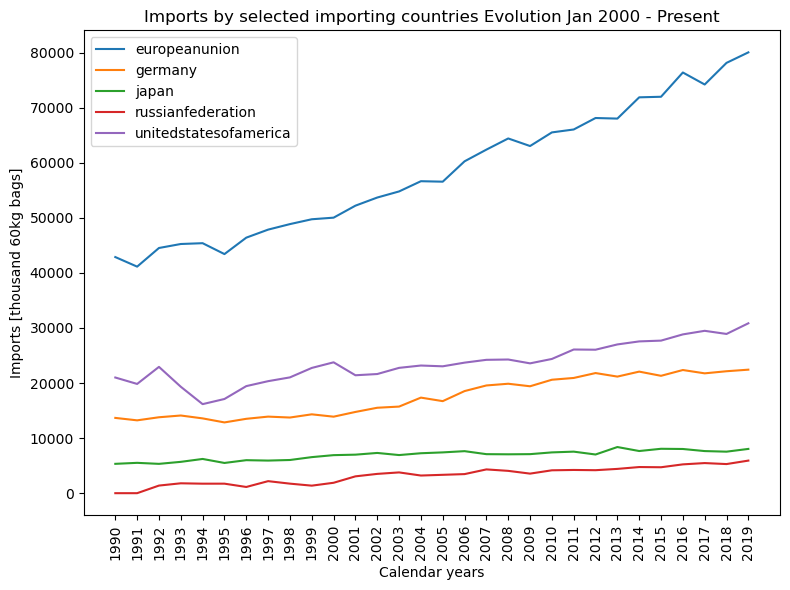

In [566]:
country_import_list = ['europeanunion','germany',
       'japan', 'russianfederation',
        'unitedstatesofamerica', ]

plt.figure(figsize=(8, 6))

for country in country_import_list:
    plt.plot(imports['calendar_year'],imports[country],label=country)

plt.xlabel('Calendar years')
plt.ylabel('Imports [thousand 60kg bags]')
plt.title('Imports by selected importing countries Evolution Jan 2000 - Present')
plt.legend()#loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Get Data - Demand - Inflation OECD ?

In [588]:
OECD_inflation = pd.read_csv('OECD_inflation_onlyOECD_2000-2022.csv')

In [589]:
display(OECD_inflation.shape)
OECD_inflation

(279, 8)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CPI,TOT,AGRWTH,M,1999-09,3.889684,NaN
1,OECD,CPI,TOT,AGRWTH,M,1999-10,3.796540,NaN
2,OECD,CPI,TOT,AGRWTH,M,1999-11,3.777679,NaN
3,OECD,CPI,TOT,AGRWTH,M,1999-12,3.912647,NaN
4,OECD,CPI,TOT,AGRWTH,M,2000-01,3.955080,NaN
...,...,...,...,...,...,...,...,...
274,OECD,CPI,TOT,AGRWTH,M,2022-07,10.243000,NaN
275,OECD,CPI,TOT,AGRWTH,M,2022-08,10.260590,NaN
276,OECD,CPI,TOT,AGRWTH,M,2022-09,10.548560,NaN
277,OECD,CPI,TOT,AGRWTH,M,2022-10,10.675630,NaN


In [590]:
def clean_OECD(df):
    # We are only interested in the Time and in the inflation rate.
    df = df[['TIME','Value']]
    # standardize header names
    df.columns = [e.lower().replace(' ', '') for e in df.columns]
    df = df.rename(columns = {'time': 'date','value':'inflation_rate'})

    #convert date into datetime, year information
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
    df['date_year'] = pd.to_datetime(df['date'], format='%Y-%m').dt.year
    df['date_month'] = pd.to_datetime(df['date'], format='%Y-%m').dt.month
    return df


In [591]:
OECD_inflation = clean_OECD(OECD_inflation)

In [592]:
OECD_inflation.head()

,date,inflation_rate,date_year,date_month
0,1999-09-01,3.889684,1999,9
1,1999-10-01,3.796540,1999,10
2,1999-11-01,3.777679,1999,11
3,1999-12-01,3.912647,1999,12
4,2000-01-01,3.955080,2000,1


### Get Data - Demand - Unemployment Rate OECD

In [598]:
OECD_unemployment = pd.read_csv('OECD_unemployment_2000-2022.csv')

In [599]:
display(OECD_unemployment.shape)
OECD_unemployment

(10666, 8)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,M,1999-09,7.040659,NaN
1,AUS,HUR,TOT,PC_LF,M,1999-10,6.775779,NaN
2,AUS,HUR,TOT,PC_LF,M,1999-11,6.439399,NaN
3,AUS,HUR,TOT,PC_LF,M,1999-12,6.683944,NaN
4,AUS,HUR,TOT,PC_LF,M,2000-01,6.767320,NaN
...,...,...,...,...,...,...,...,...
10661,CRI,HUR,TOT,PC_LF,M,2022-06,11.845340,NaN
10662,CRI,HUR,TOT,PC_LF,M,2022-07,11.852950,NaN
10663,CRI,HUR,TOT,PC_LF,M,2022-08,11.975810,NaN
10664,CRI,HUR,TOT,PC_LF,M,2022-09,11.466230,NaN


In [600]:
OECD_unemployment = OECD_unemployment[OECD_unemployment['LOCATION'] == 'OECD'].reset_index()
OECD_unemployment

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,8674,OECD,HUR,TOT,PC_LF,M,2001-01,6.455023,E
1,8675,OECD,HUR,TOT,PC_LF,M,2001-02,6.472813,E
2,8676,OECD,HUR,TOT,PC_LF,M,2001-03,6.474783,E
3,8677,OECD,HUR,TOT,PC_LF,M,2001-04,6.498424,E
4,8678,OECD,HUR,TOT,PC_LF,M,2001-05,6.518929,E
...,...,...,...,...,...,...,...,...,...
258,8932,OECD,HUR,TOT,PC_LF,M,2022-07,4.859888,E
259,8933,OECD,HUR,TOT,PC_LF,M,2022-08,4.908968,E
260,8934,OECD,HUR,TOT,PC_LF,M,2022-09,4.907044,E
261,8935,OECD,HUR,TOT,PC_LF,M,2022-10,4.920747,E


In [601]:
OECD_unemployment = clean_OECD(OECD_unemployment)

In [602]:
OECD_unemployment.head()

,date,inflation_rate,date_year,date_month
0,2001-01-01,6.455023,2001,1
1,2001-02-01,6.472813,2001,2
2,2001-03-01,6.474783,2001,3
3,2001-04-01,6.498424,2001,4
4,2001-05-01,6.518929,2001,5


## Combine data to obtain Dataset

In [ ]:
#complete_dataset = pd.concat([df3, df4], axis=1)